# Eksamen


## Bilmarkedet
Af: Mathias Nikolaisen(dnt357), Oliver Mattthews(jvc975) & Clara Maj Folkmann(djz279)

### Problem 1

In [29]:
#1.a
import pandas as pd
df = pd.read_csv("cars.csv")

In [2]:
df.describe()

,year,product_id,sales,number_households,price,height,footprint,weight,hp,mpg,...,HEV,PHEV,EV,car,suv,truck,van,market_share,no_car,dlogS
count,9694.000000,9694.000000,9694.000000,9.694000e+03,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,...,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9.694000e+03,9694.000000,9694.000000
mean,2001.096761,486.674954,59103.391036,1.072133e+08,36.047691,60.948141,13392.630004,3561.211136,192.181968,20.936151,...,0.032907,0.007737,0.008665,0.631937,0.231277,0.070559,0.066227,1.422180e-03,0.650272,-7.252747
std,11.076957,278.997528,86940.254077,1.393279e+07,17.126564,8.411517,1968.915195,897.765526,83.882441,6.583005,...,0.178402,0.087622,0.092687,0.482303,0.421671,0.256100,0.248690,2.098420e-03,0.048143,1.961685
min,1980.000000,0.000000,10.000000,8.078000e+07,11.144782,43.500000,6514.540000,1113.000000,44.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.980669e-07,0.578260,-15.081906
25%,1992.000000,252.000000,7990.500000,9.567000e+07,24.081777,54.700000,12000.155000,2925.000000,127.500000,17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.831745e-04,0.619893,-8.189256
50%,2002.000000,512.000000,27394.000000,1.093000e+08,31.820235,57.700000,13330.064000,3470.500000,175.000000,19.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.379377e-04,0.644168,-6.919975
75%,2011.000000,693.000000,74560.500000,1.186800e+08,43.404583,67.100000,14532.730000,4045.500000,250.000000,23.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.779007e-03,0.672930,-5.887575
max,2018.000000,1066.000000,891482.000000,1.275900e+08,99.986388,107.500000,21821.859000,8550.000000,645.000000,50.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.104001e-02,0.777283,-3.318301


In [30]:
import numpy as np

df = pd.read_csv("cars.csv")

# 'type' based on dummys
conditions = [
    df['car'] == 1,
    df['suv'] == 1,
    df['truck'] == 1,
    df['van'] == 1
]
choices = ['car', 'suv', 'truck', 'van']
df['type'] = np.select(conditions, choices, default='other')

# Group & average
grouped_data = df.groupby(['year', 'type']).agg({
    'price': 'mean',
    'market_share': 'mean',
    'hp': 'mean',
    'mpg': 'mean',
    'footprint': 'mean',
    'weight': 'mean'
}).reset_index()

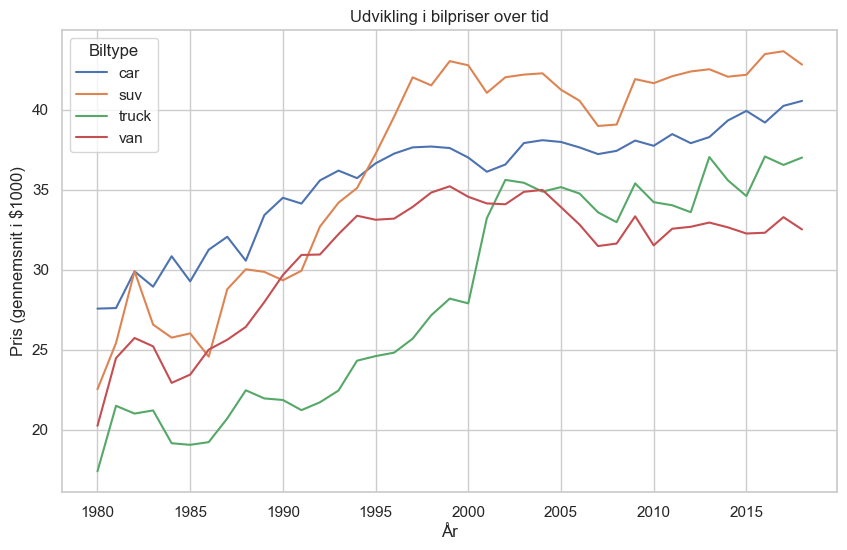

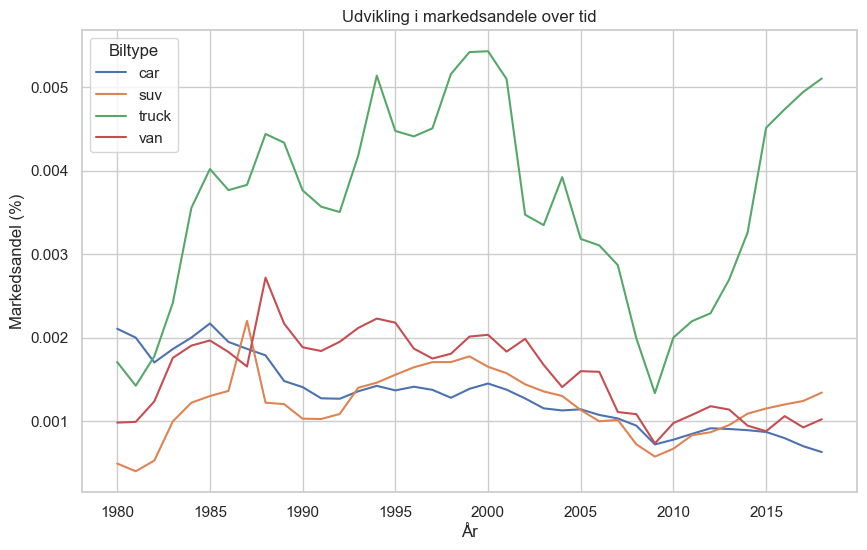

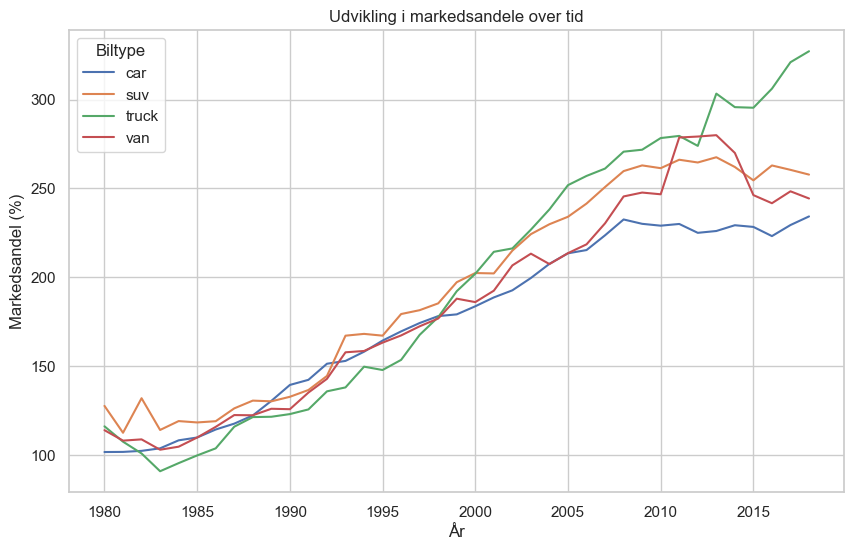

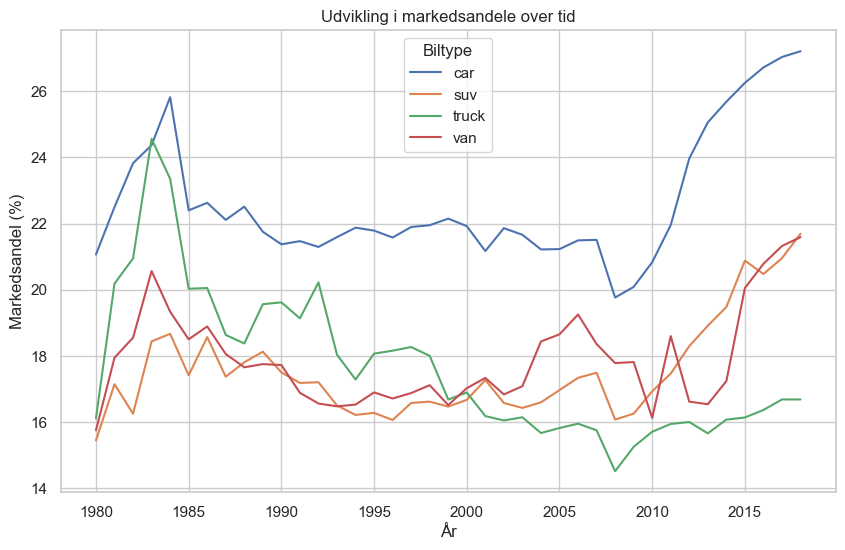

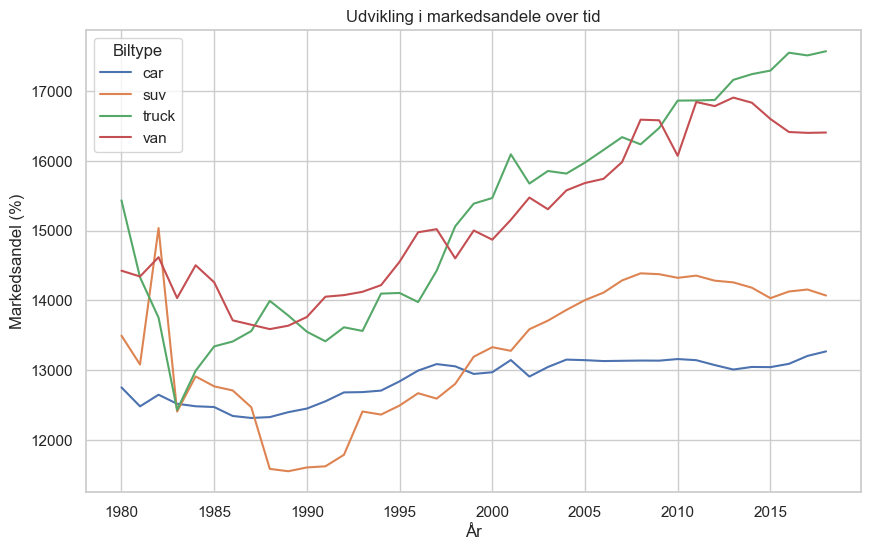

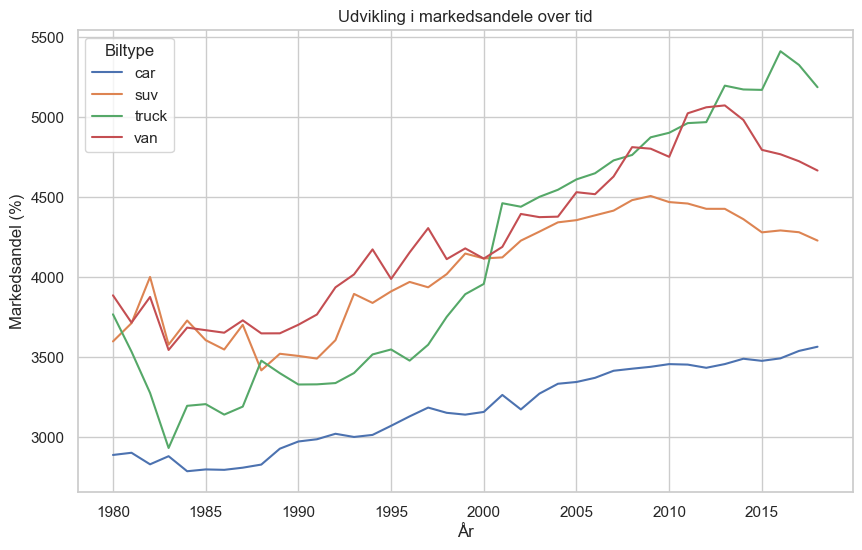

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# price over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='price', hue='type')
plt.title("Udvikling i bilpriser over tid")
plt.xlabel("År")
plt.ylabel("Pris (gennemsnit i $1000)")
plt.legend(title='Biltype')
plt.show()

# market_share over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='market_share', hue='type')
plt.title("Udvikling i markedsandele over tid")
plt.xlabel("År")
plt.ylabel("Markedsandel (%)")
plt.legend(title='Biltype')
plt.show()

# hp over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='hp', hue='type')
plt.title("Udvikling i markedsandele over tid")
plt.xlabel("År")
plt.ylabel("Markedsandel (%)")
plt.legend(title='Biltype')
plt.show()

# mpg over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='mpg', hue='type')
plt.title("Udvikling i markedsandele over tid")
plt.xlabel("År")
plt.ylabel("Markedsandel (%)")
plt.legend(title='Biltype')
plt.show()

#footprint over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='footprint', hue='type')
plt.title("Udvikling i markedsandele over tid")
plt.xlabel("År")
plt.ylabel("Markedsandel (%)")
plt.legend(title='Biltype')
plt.show()

# weight over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='weight', hue='type')
plt.title("Udvikling i markedsandele over tid")
plt.xlabel("År")
plt.ylabel("Markedsandel (%)")
plt.legend(title='Biltype')
plt.show()

Regression af dlogS på pris:
                            OLS Regression Results                            
Dep. Variable:                  dlogS   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     1152.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          1.30e-238
Time:                        11:30:35   Log-Likelihood:                -19742.
No. Observations:                9694   AIC:                         3.949e+04
Df Residuals:                    9692   BIC:                         3.950e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9072  

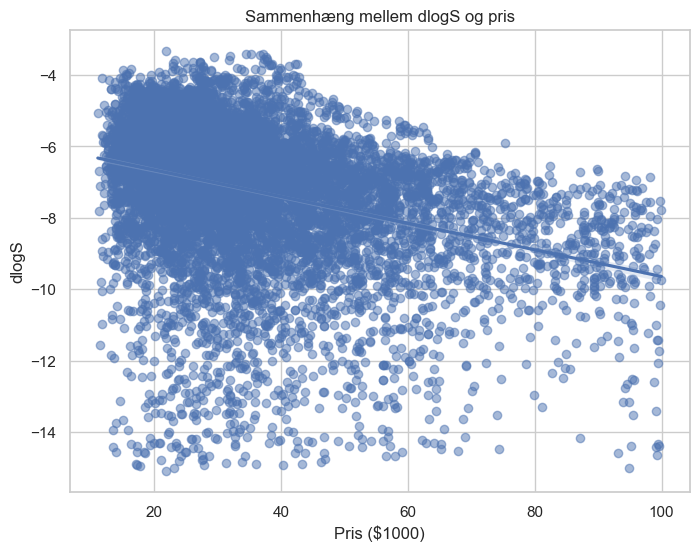

Regression af pris på fysiske attributter (vægt, footprint, hp):
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     3265.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:30:35   Log-Likelihood:                -37906.
No. Observations:                9694   AIC:                         7.582e+04
Df Residuals:                    9690   BIC:                         7.585e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

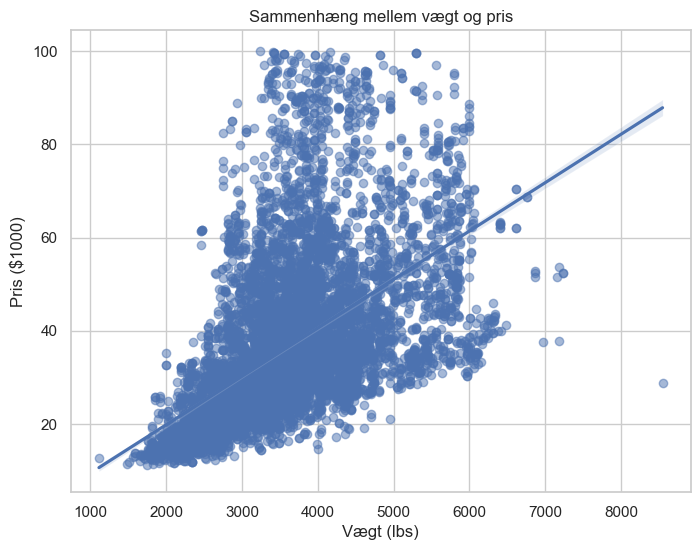

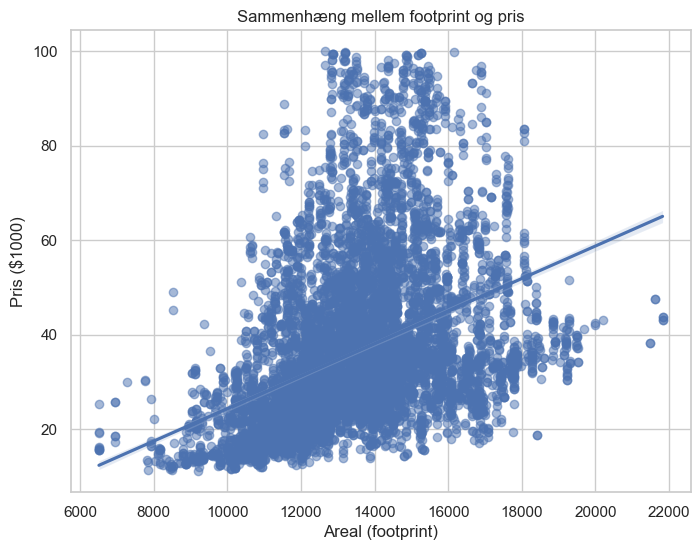

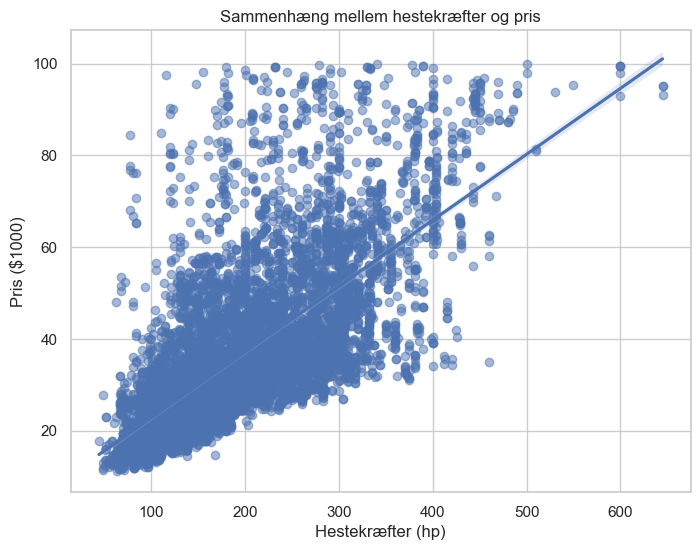

In [32]:
import statsmodels.api as sm

X = df['price']
y = df['dlogS']
X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
print("Regression af dlogS på pris:")
print(model1.summary())

# Scatter plot for dlogS/price
plt.figure(figsize=(8, 6))
sns.regplot(x='price', y='dlogS', data=df, scatter_kws={'alpha':0.5})
plt.title("Sammenhæng mellem dlogS og pris")
plt.xlabel("Pris ($1000)")
plt.ylabel("dlogS")
plt.show()

X = df[['weight', 'footprint', 'hp']]
y = df['price']
X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()
print("Regression af pris på fysiske attributter (vægt, footprint, hp):")
print(model2.summary())

plt.figure(figsize=(8, 6))
sns.regplot(x='weight', y='price', data=df, scatter_kws={'alpha':0.5})
plt.title("Sammenhæng mellem vægt og pris")
plt.xlabel("Vægt (lbs)")
plt.ylabel("Pris ($1000)")
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x='footprint', y='price', data=df, scatter_kws={'alpha':0.5})
plt.title("Sammenhæng mellem footprint og pris")
plt.xlabel("Areal (footprint)")
plt.ylabel("Pris ($1000)")
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x='hp', y='price', data=df, scatter_kws={'alpha':0.5})
plt.title("Sammenhæng mellem hestekræfter og pris")
plt.xlabel("Hestekræfter (hp)")
plt.ylabel("Pris ($1000)")
plt.show()


In [7]:
#1.b

### Problem 2

In [26]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("cars.csv")

# Convert 'make' to dummy variables
df_dummies = pd.get_dummies(df, columns=['make'], drop_first=True)

# Define the independent (X) and dependent (y) variables
X1 = df_dummies[['price', 'hp', 'mpg', 'height', 'footprint', 'weight', 'number_trims', 'releaseYear', 'yearsSinceDesign'] + 
                [col for col in df_dummies.columns if 'make_' in col]]
X1 = sm.add_constant(X1)
y = df_dummies['dlogS']

# Convert all columns in X1 and y to numeric, forcing bools to float64
X1 = X1.apply(lambda x: x.astype(float) if x.dtype == 'bool' else x)
y = pd.to_numeric(y, errors='coerce')

# Drop rows with NaN values to avoid issues in the regression model
X1 = X1.dropna()
y = y.loc[X1.index]

# Fit the OLS model
try:
    ols_model_with_dummies = sm.OLS(y, X1).fit()
    print(ols_model_with_dummies.summary())
except Exception as e:
    print("An error occurred:", e)


                            OLS Regression Results                            
Dep. Variable:                  dlogS   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     83.11
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:14:07   Log-Likelihood:                -17995.
No. Observations:                9694   AIC:                         3.613e+04
Df Residuals:                    9623   BIC:                         3.664e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.9716      0

### Problem 3

### IV


In [13]:
import pandas as pd
df = pd.read_csv("cars.csv")
def gh_iv(df, characteristics):
    df_iv = df.copy()
    for char in characteristics:
        # Normaliser karakteristikken inden for hvert år
        df_iv[char] = df_iv.groupby('year')[char].transform(lambda x: x / x.std())
        
        # Beregn antallet af biler tæt på hver bils karakteristika
        df_iv[f'gh_iv_{char}'] = df_iv.groupby('year').apply(
            lambda group: group[char].apply(lambda x: ((group[char] - x).abs() < group[char].std()).sum())
        ).reset_index(level=0, drop=True)
    
    return df_iv[[f'gh_iv_{char}' for char in characteristics]]  # Returner kun instrumentkolonnerne


### 2SLS

In [14]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS

# Forbered data
df_iv = gh_iv(df, ['hp', 'weight', 'mpg'])  # F.eks. hvis disse karakteristika bruges
X = df[['price', 'hp', 'mpg', 'weight']]  # Forklarende variabler
Z = df_iv  # Instrumenter

# Tilføj konstant
X = sm.add_constant(X)

# 2SLS estimation
iv_model = IV2SLS(df['dlogS'], X, instrument=Z)
iv_results = iv_model.fit()
print(iv_results.summary())


                          IV2SLS Regression Results                           
Dep. Variable:                  dlogS   R-squared:                      -0.335
Model:                         IV2SLS   Adj. R-squared:                 -0.336
Method:                     Two Stage   F-statistic:                -6.939e-11
                        Least Squares   Prob (F-statistic):               1.00
Date:                Fri, 01 Nov 2024                                         
Time:                        12:07:13                                         
No. Observations:                9694                                         
Df Residuals:                    9689                                         
Df Model:                           4                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8833   6.83e+05   2.76e-06      1.0

c:\Users\mathi\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
c:\Users\mathi\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1883: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


## Problem 4

## Problem 5